# Red Wine Quality Prediction

### Import libraries

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
# Importing dataset
df=pd.read_csv('Datasets/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

### Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [3]:
df.shape

(1599, 12)

Dataset is having 1599 rows and 12 columns

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Column names in the dataset 

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the independent variables are of float type and target variable is of integer type.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Here, we get the information regarding dataset i.e. RangeIndex,Dtype,Non-null count

### EDA

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null values in the dataset

In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Above are the classes present in 'quality' column

In [8]:
df['quality'].nunique()

6

There are total 6 classes in the target column of the dataset

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Classes are not balanced and thus class imbalance algorithm is required

In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Standard devation is high for 'free sulfur dioxide','total sulfur dioxide'.
Most of the columns have right skewed data (mean>median) except 'sulphates' and 'quality'
Large difference between 75% and max for columns 'residual sugar','free sulfur dioxide','total sulfur dioxide'
Hence, there are extreme outliers.

In [14]:
#Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

There are many outliers in the dataset.

In [15]:
#Checking skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

We can see skewness is present here.
+/-0.5 is the acceptable range of skewness. No need to remove skewness from categorical column even after encoding.

In [12]:
# Checking correlation
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

Only alcohol is having good bond with target column, all other independent variables are having bad bond with target variable. pH and density are having high colinearity hence multicolinearty exists.

### Visualisations

<AxesSubplot:>

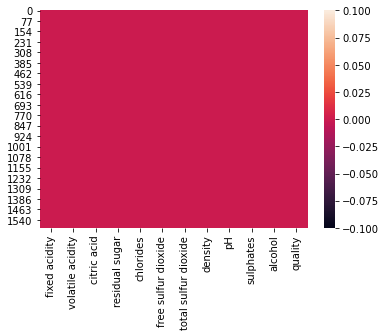

In [50]:
sns.heatmap(df.isnull())

No null values in the dataset

<AxesSubplot:xlabel='quality', ylabel='count'>

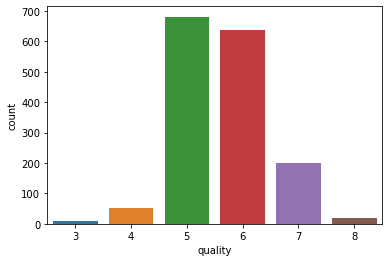

In [55]:
sns.countplot(df['quality'])

Quality 5 & 6 have highest records as compared to others, there is class imbalance.

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

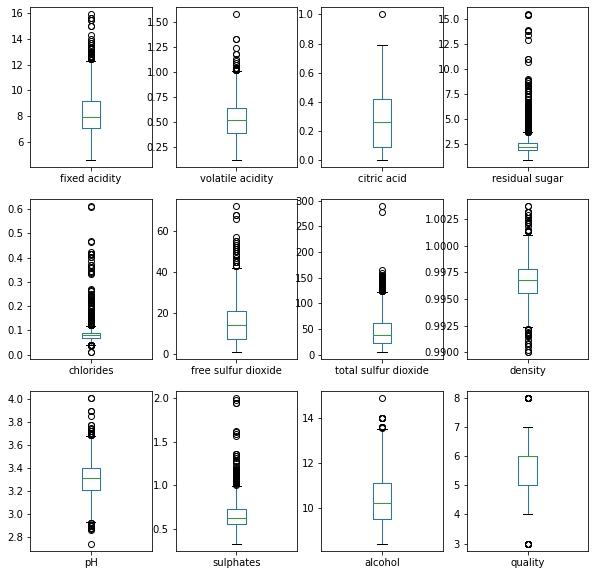

In [57]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

Outliers are present in all columns

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

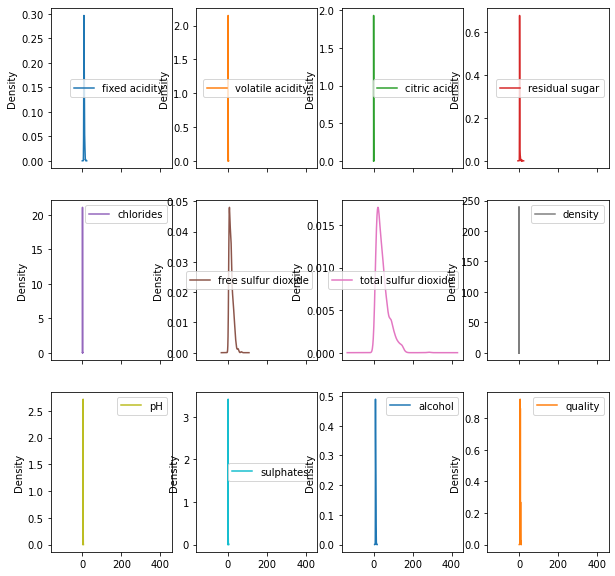

In [67]:
df.plot(kind='kde',subplots=True,layout=(3,4),figsize=(10,10))

In above dstribution plots, we can see outliers and skewness are present

<AxesSubplot:>

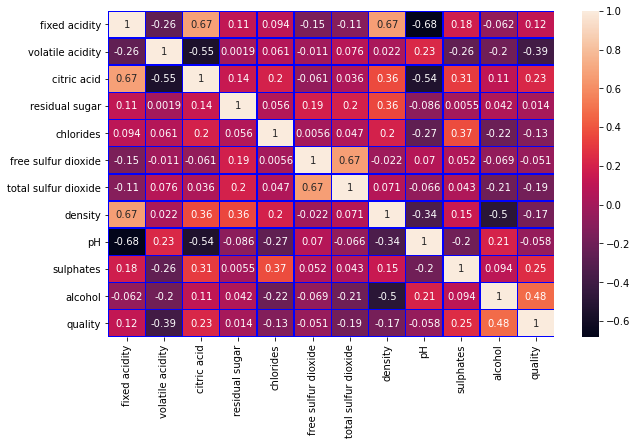

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='b')

No column seems to be highly correlated with one another. Only 'alcohol' has good bond with 'quality', remaining all columns are having weak bond.

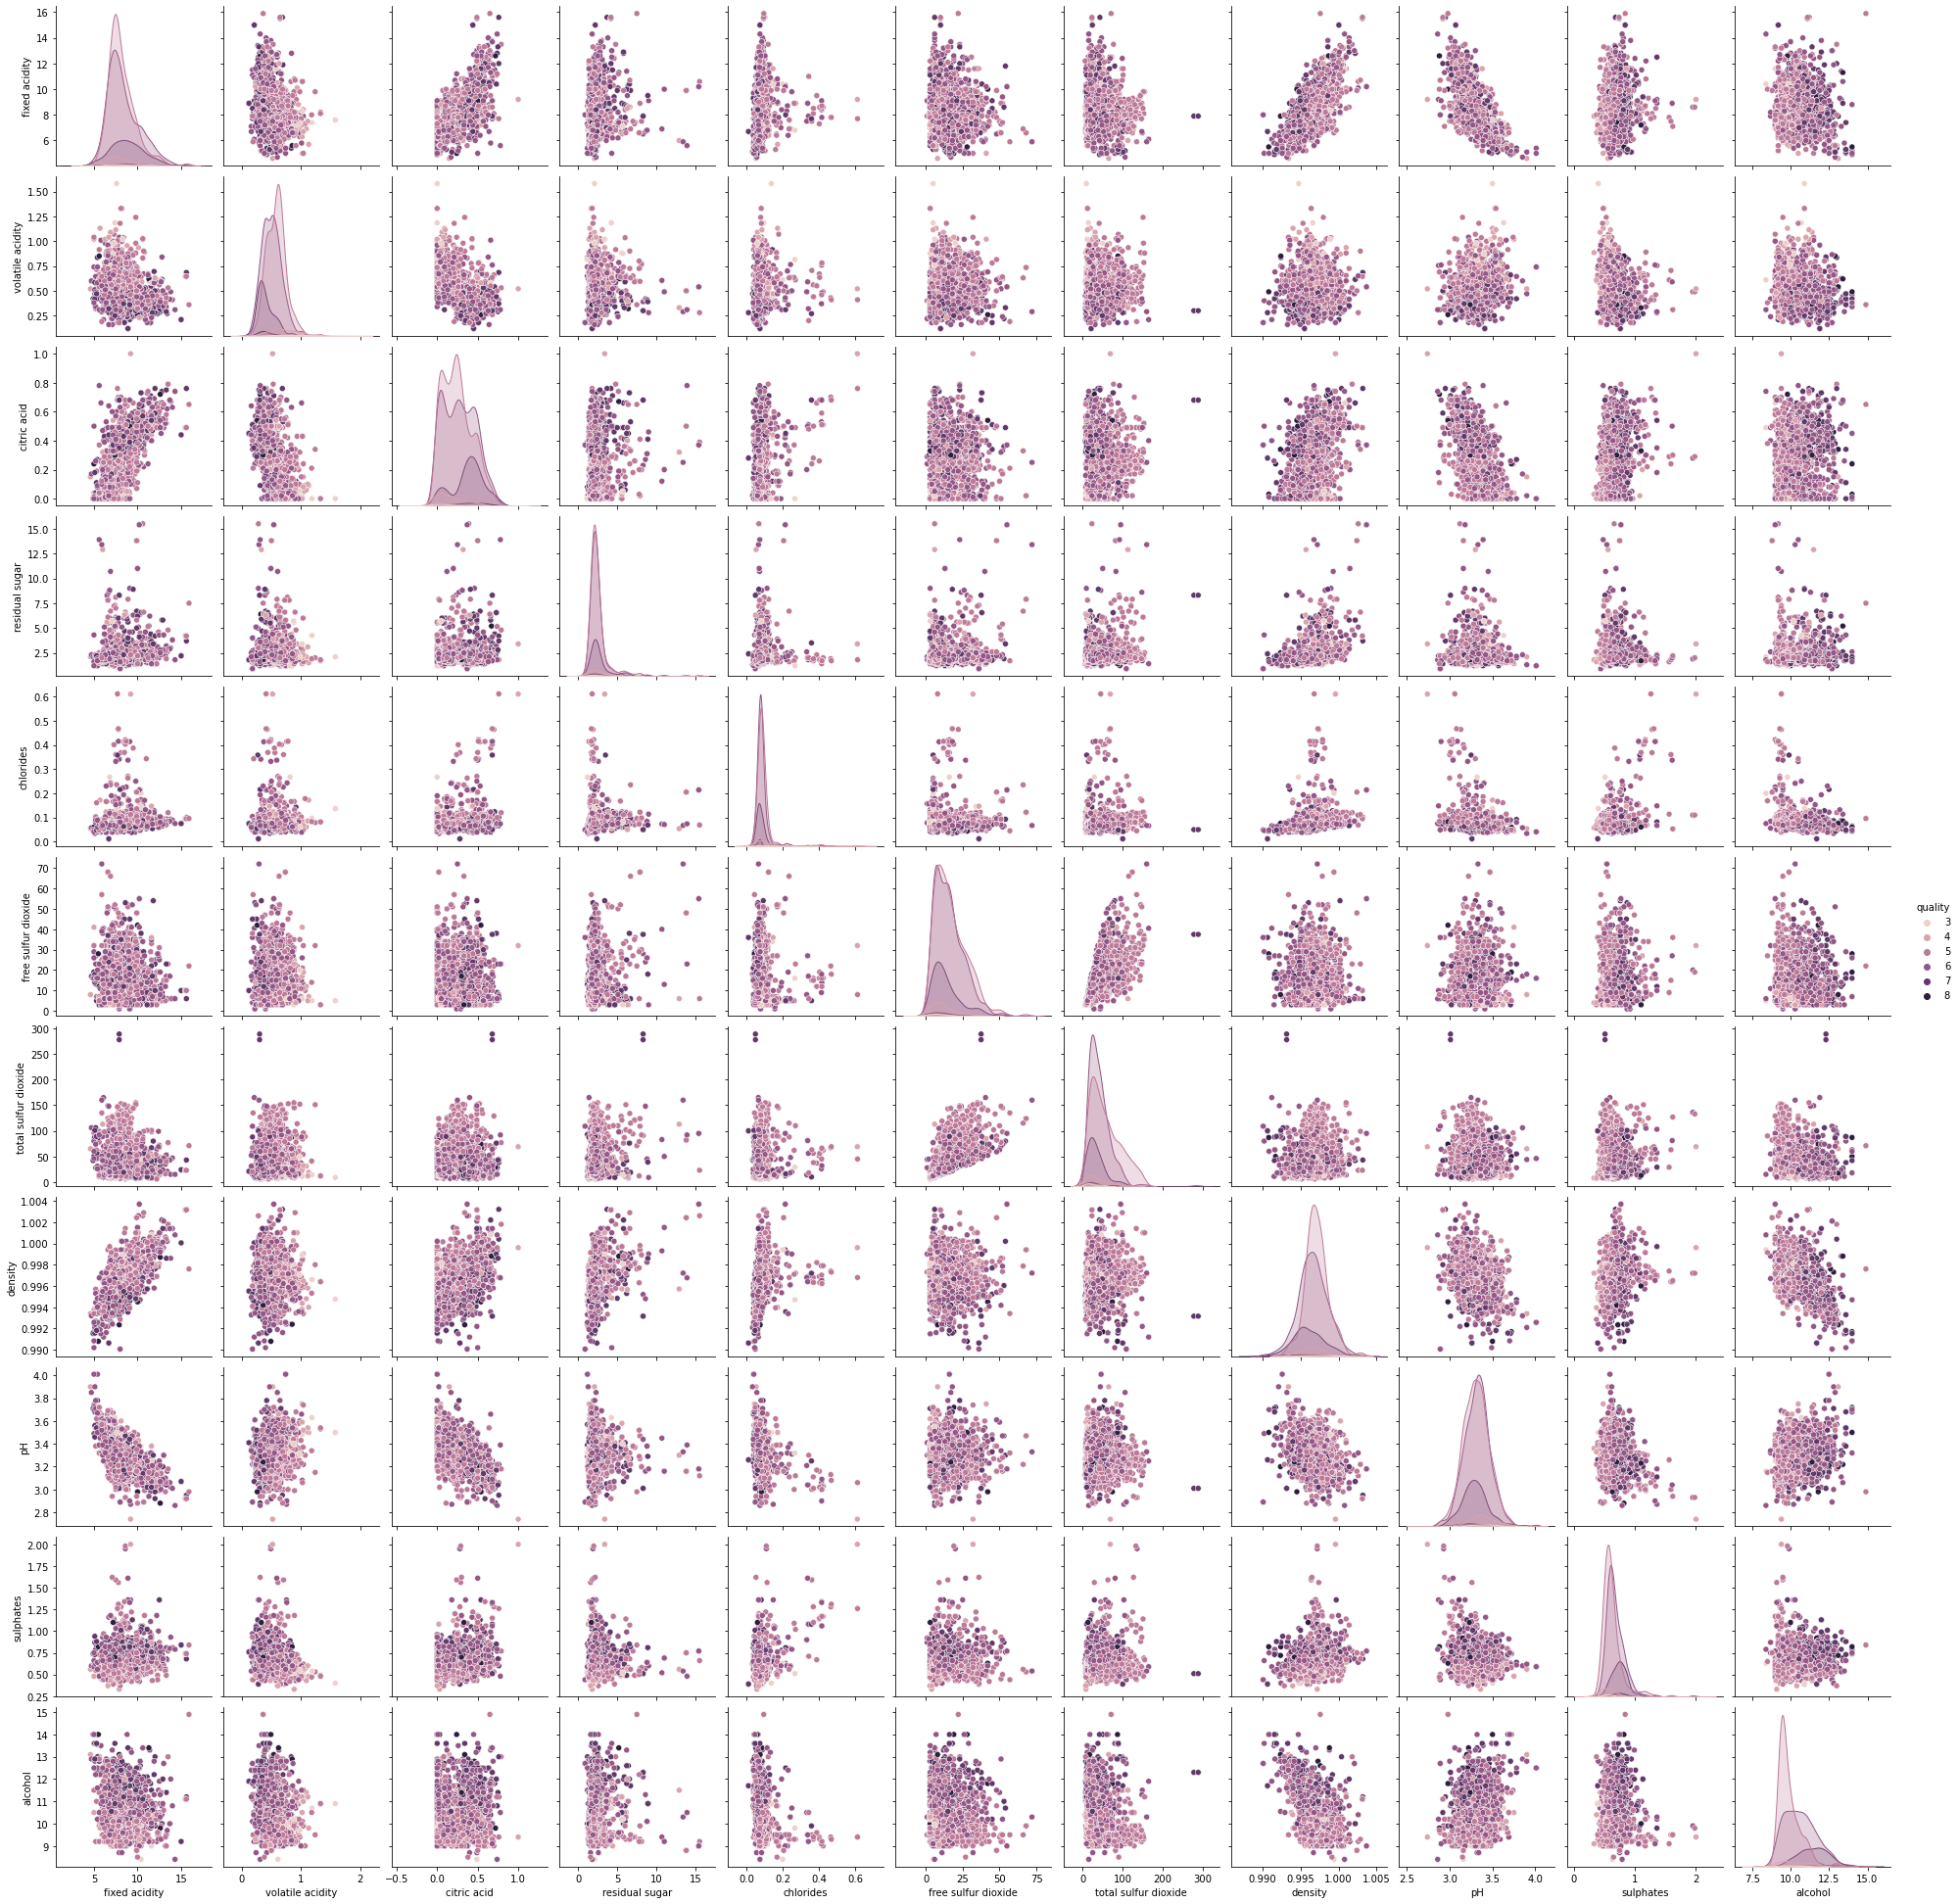

In [70]:
sns.pairplot(df,hue='quality')

Created plot of each column with other column that shows distribution and so much of overlapping can be seen here within columns.

### Data Cleaning

In [16]:
# Removing outliers
df1=df[(z<3).all(axis=1)]
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1451 rows x 12 columns]

In [17]:
#Comparing the shapes after removing outliers
print(df.shape)
print(df1.shape)

(1599, 12)
(1451, 12)


In [18]:
loss_percent=(1599-1451)/1599*100
loss_percent

9.255784865540964

Approx 9% data is lost on removing the outliers

In [19]:
# Removing Skewness
df1.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [20]:
df2=df1.copy()
df2['fixed acidity']=np.log(df1['fixed acidity'])
df2['residual sugar']=np.log(df1['residual sugar'])
df2['chlorides']=np.log(df1['chlorides'])
df2['free sulfur dioxide']=np.log(df1['free sulfur dioxide'])
df2['total sulfur dioxide']=np.log(df1['total sulfur dioxide'])
df2['sulphates']=np.log(df1['sulphates'])
df2['alcohol']=np.log(df1['alcohol'])

df2.skew()

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
quality                 0.407865
dtype: float64

In [49]:
#Printing new dataset
df2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480             0.700         0.00        0.641854  -2.577022   
1          2.054124             0.880         0.00        0.955511  -2.322788   
2          2.054124             0.760         0.04        0.832909  -2.385967   
3          2.415914             0.280         0.56        0.641854  -2.590267   
4          2.001480             0.700         0.00        0.641854  -2.577022   
...             ...               ...          ...             ...        ...   
1594       1.824549             0.600         0.08        0.693147  -2.407946   
1595       1.774952             0.550         0.10        0.788457  -2.780621   
1596       1.840550             0.510         0.13        0.832909  -2.577022   
1597       1.774952             0.645         0.12        0.693147  -2.590267   
1598       1.791759             0.310         0.47        1.280934  -2.703063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                2.397895              3.526361  0.99780  3.51  -0.579818   
1                3.218876              4.204693  0.99680  3.20  -0.385662   
2                2.708050              3.988984  0.99700  3.26  -0.430783   
3                2.833213              4.094345  0.99800  3.16  -0.544727   
4                2.397895              3.526361  0.99780  3.51  -0.579818   
...                   ...                   ...      ...   ...        ...   
1594             3.465736              3.784190  0.99490  3.45  -0.544727   
1595             3.663562              3.931826  0.99512  3.52  -0.274437   
1596             3.367296              3.688879  0.99574  3.42  -0.287682   
1597             3.465736              3.784190  0.99547  3.57  -0.342490   
1598             2.890372              3.737670  0.99549  3.39  -0.415515   

       alcohol  quality  
0     2.240710        5  
1     2.282382        5  
2     2.282382        5  
3     2.282382        6  
4     2.240710        5  
...        ...      ...  
1594  2.351375        5  
1595  2.415914        6  
1596  2.397895        6  
1597  2.322388        5  
1598  2.397895        6  

[1451 rows x 12 columns]

### Set an arbitrary cutoff for the dependent variables (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [50]:
dff=df2.copy()
dff['score']=0
for index,value in zip(dff['quality'].index,dff['quality']) :
    if value>=7 :
        dff['score'][index]=1
    else:
        dff['score'][index]=0

In [51]:
dff.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        2.001480             0.700         0.00        0.641854  -2.577022   
1        2.054124             0.880         0.00        0.955511  -2.322788   
2        2.054124             0.760         0.04        0.832909  -2.385967   
3        2.415914             0.280         0.56        0.641854  -2.590267   
4        2.001480             0.700         0.00        0.641854  -2.577022   
5        2.001480             0.660         0.00        0.587787  -2.590267   
6        2.066863             0.600         0.06        0.470004  -2.673649   
7        1.987874             0.650         0.00        0.182322  -2.733368   
8        2.054124             0.580         0.02        0.693147  -2.617296   
9        2.014903             0.500         0.36        1.808289  -2.645075   
10       1.902108             0.580         0.08        0.587787  -2.333044   
11       2.014903             0.500         0.36        1.808289  -2.645075   
12       1.722767             0.615         0.00        0.470004  -2.419119   
16       2.140066             0.280         0.56        0.587787  -2.385967   
18       2.001480             0.590         0.08        1.481605  -2.453408   
20       2.186051             0.220         0.48        0.587787  -2.563950   
21       2.028148             0.390         0.31        0.832909  -2.501036   
22       2.066863             0.430         0.21        0.470004  -2.244316   
23       2.140066             0.490         0.11        0.832909  -2.476938   
24       1.931521             0.400         0.14        0.875469  -2.465104   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0              2.397895              3.526361   0.9978  3.51  -0.579818   
1              3.218876              4.204693   0.9968  3.20  -0.385662   
2              2.708050              3.988984   0.9970  3.26  -0.430783   
3              2.833213              4.094345   0.9980  3.16  -0.544727   
4              2.397895              3.526361   0.9978  3.51  -0.579818   
5              2.564949              3.688879   0.9978  3.51  -0.579818   
6              2.708050              4.077537   0.9964  3.30  -0.776529   
7              2.708050              3.044522   0.9946  3.39  -0.755023   
8              2.197225              2.890372   0.9968  3.36  -0.562119   
9              2.833213              4.624973   0.9978  3.35  -0.223144   
10             2.708050              4.174387   0.9959  3.28  -0.616186   
11             2.833213              4.624973   0.9978  3.35  -0.223144   
12             2.772589              4.077537   0.9943  3.58  -0.653926   
16             3.555348              4.634729   0.9969  3.30  -0.287682   
18             1.791759              3.367296   0.9974  3.38  -0.693147   
20             3.367296              4.094345   0.9968  3.39  -0.634878   
21             3.135494              4.262680   0.9982  3.52  -0.430783   
22             2.302585              3.610918   0.9966  3.17  -0.094311   
23             2.197225              4.204693   0.9968  3.17  -0.634878   
24             3.044522              3.688879   0.9968  3.43  -0.462035   

     alcohol  quality  score  
0   2.240710        5      0  
1   2.282382        5      0  
2   2.282382        5      0  
3   2.282382        6      0  
4   2.240710        5      0  
5   2.240710        5      0  
6   2.240710        5      0  
7   2.302585        7      1  
8   2.251292        7      1  
9   2.351375        5      0  
10  2.219203        5      0  
11  2.351375        5      0  
12  2.292535        5      0  
16  2.351375        7      1  
18  2.197225        4      0  
20  2.240710        6      0  
21  2.272126        5      0  
22  2.251292        5      0  
23  2.240710        5      0  
24  2.272126        6      0

In [52]:
# Drop the 'quality' column as now our target column is 'score'
dff.drop('quality',axis=1,inplace=True)

In [53]:
# Check final dataset
dff

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480             0.700         0.00        0.641854  -2.577022   
1          2.054124             0.880         0.00        0.955511  -2.322788   
2          2.054124             0.760         0.04        0.832909  -2.385967   
3          2.415914             0.280         0.56        0.641854  -2.590267   
4          2.001480             0.700         0.00        0.641854  -2.577022   
...             ...               ...          ...             ...        ...   
1594       1.824549             0.600         0.08        0.693147  -2.407946   
1595       1.774952             0.550         0.10        0.788457  -2.780621   
1596       1.840550             0.510         0.13        0.832909  -2.577022   
1597       1.774952             0.645         0.12        0.693147  -2.590267   
1598       1.791759             0.310         0.47        1.280934  -2.703063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                2.397895              3.526361  0.99780  3.51  -0.579818   
1                3.218876              4.204693  0.99680  3.20  -0.385662   
2                2.708050              3.988984  0.99700  3.26  -0.430783   
3                2.833213              4.094345  0.99800  3.16  -0.544727   
4                2.397895              3.526361  0.99780  3.51  -0.579818   
...                   ...                   ...      ...   ...        ...   
1594             3.465736              3.784190  0.99490  3.45  -0.544727   
1595             3.663562              3.931826  0.99512  3.52  -0.274437   
1596             3.367296              3.688879  0.99574  3.42  -0.287682   
1597             3.465736              3.784190  0.99547  3.57  -0.342490   
1598             2.890372              3.737670  0.99549  3.39  -0.415515   

       alcohol  score  
0     2.240710      0  
1     2.282382      0  
2     2.282382      0  
3     2.282382      0  
4     2.240710      0  
...        ...    ...  
1594  2.351375      0  
1595  2.415914      0  
1596  2.397895      0  
1597  2.322388      0  
1598  2.397895      0  

[1451 rows x 12 columns]

<AxesSubplot:>

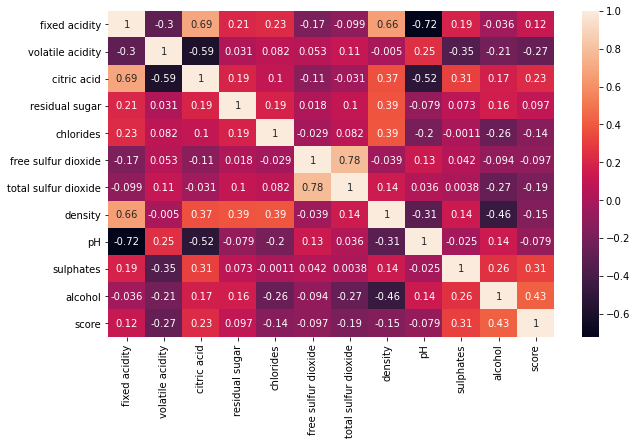

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(dff.corr(),annot=True)

No column is highly correlated with target 'score'. But few independent variables have share a good bond with each other.

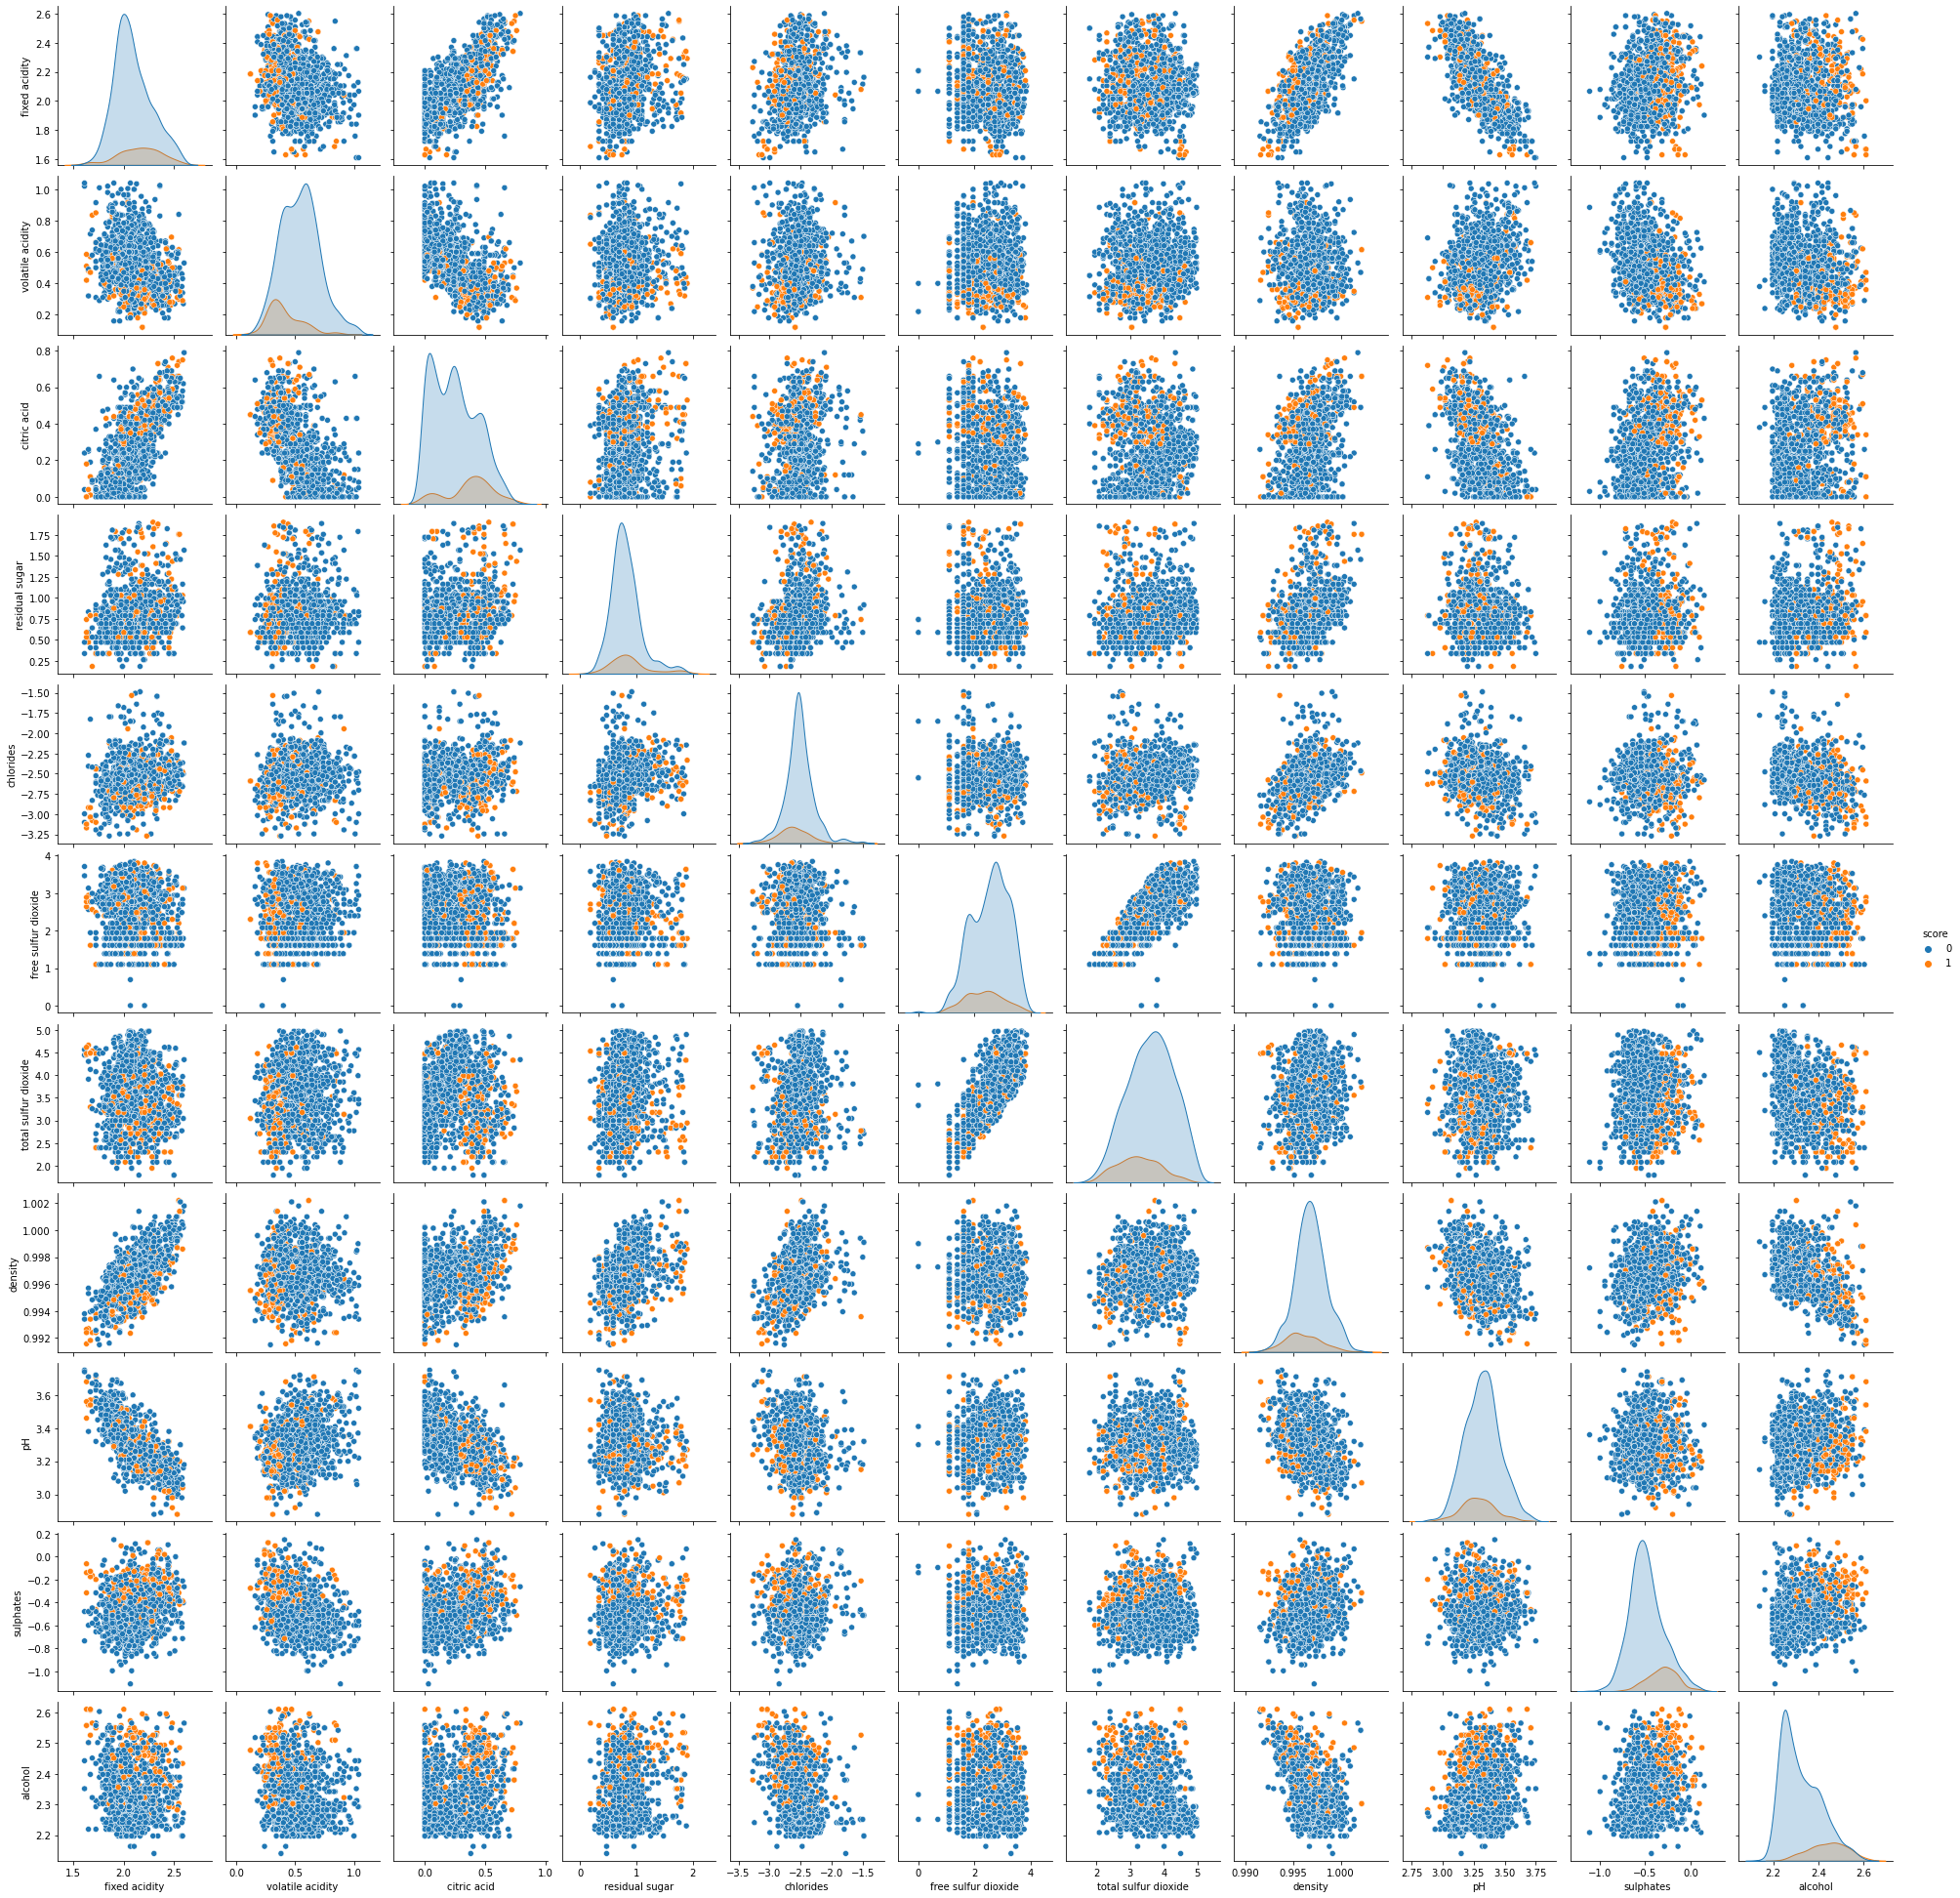

In [145]:
sns.pairplot(dff,hue='score')

Output values are highly overlapped. 

In [55]:
# Values in target column
print(dff['score'].unique())

[0 1]


### Separating the columns into x and y 

In [56]:
x=dff.iloc[:,:11]
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480             0.700         0.00        0.641854  -2.577022   
1          2.054124             0.880         0.00        0.955511  -2.322788   
2          2.054124             0.760         0.04        0.832909  -2.385967   
3          2.415914             0.280         0.56        0.641854  -2.590267   
4          2.001480             0.700         0.00        0.641854  -2.577022   
...             ...               ...          ...             ...        ...   
1594       1.824549             0.600         0.08        0.693147  -2.407946   
1595       1.774952             0.550         0.10        0.788457  -2.780621   
1596       1.840550             0.510         0.13        0.832909  -2.577022   
1597       1.774952             0.645         0.12        0.693147  -2.590267   
1598       1.791759             0.310         0.47        1.280934  -2.703063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                2.397895              3.526361  0.99780  3.51  -0.579818   
1                3.218876              4.204693  0.99680  3.20  -0.385662   
2                2.708050              3.988984  0.99700  3.26  -0.430783   
3                2.833213              4.094345  0.99800  3.16  -0.544727   
4                2.397895              3.526361  0.99780  3.51  -0.579818   
...                   ...                   ...      ...   ...        ...   
1594             3.465736              3.784190  0.99490  3.45  -0.544727   
1595             3.663562              3.931826  0.99512  3.52  -0.274437   
1596             3.367296              3.688879  0.99574  3.42  -0.287682   
1597             3.465736              3.784190  0.99547  3.57  -0.342490   
1598             2.890372              3.737670  0.99549  3.39  -0.415515   

       alcohol  
0     2.240710  
1     2.282382  
2     2.282382  
3     2.282382  
4     2.240710  
...        ...  
1594  2.351375  
1595  2.415914  
1596  2.397895  
1597  2.322388  
1598  2.397895  

[1451 rows x 11 columns]

In [57]:
y=dff.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: score, Length: 1451, dtype: int64

### Multicollinearity with VIF

In [58]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

Variables  VIF Factors
0          fixed acidity   432.228506
1       volatile acidity    19.212506
2            citric acid     8.961249
3         residual sugar    10.820651
4              chlorides   145.699917
5    free sulfur dioxide    43.085721
6   total sulfur dioxide    87.927343
7                density  3475.641818
8                     pH  1302.242196
9              sulphates     8.379902
10               alcohol   850.742887

In [60]:
# Drop highest collinear column and check multicollinearity
xn=x.drop('density',axis=1)
calc_vif(xn)

Variables  VIF Factors
0         fixed acidity   173.999885
1      volatile acidity    19.206630
2           citric acid     8.670029
3        residual sugar    10.596272
4             chlorides   144.414777
5   free sulfur dioxide    42.064907
6  total sulfur dioxide    78.907412
7                    pH   552.711542
8             sulphates     7.788559
9               alcohol   688.482983

In dataset, among multicolnear columns the features that are contributing less to the output variable are dropped. We can drop 1-2 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+/-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(xn)
x1

array([[-0.51241835,  1.05091371, -1.39039974, ...,  1.37589608,
        -0.61065143, -1.03394178],
       [-0.235682  ,  2.11933582, -1.39039974, ..., -0.8219512 ,
         0.39101696, -0.59651158],
       [-0.235682  ,  1.40705441, -1.18083057, ..., -0.3965614 ,
         0.15823656, -0.59651158],
       ...,
       [-1.35839334, -0.07686519, -0.70929993, ...,  0.73781138,
         0.89650672,  0.61600477],
       [-1.70322361,  0.72445139, -0.76169222, ...,  1.80128587,
         0.61374608, -0.17658335],
       [-1.61487234, -1.26400088,  1.07203802, ...,  0.52511649,
         0.23700283,  0.61600477]])

### Find best randon state for Train-Test Split

In [62]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [81]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    predtrain=dtc.predict(x_train)
    predtest=dtc.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i
        
print('Best random state : ',rs,' Accuracy(Training) : ',acctrain,' Accuracy(Testing) : ',maxAcc)

Best random state :  4  Accuracy(Training) :  1.0  Accuracy(Testing) :  0.9175257731958762


We get the Best random state as 4 giving accuracy of 91%

In [82]:
# train-test split with best randon state and fnding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 10)
(291, 10)
(1160,)
(291,)


### Treating class imbalance

In [83]:
y_train.value_counts()

0    995
1    165
Name: score, dtype: int64

Huge difference is there in both classes of training set

In [84]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_train,y_train)

Resampling is done on training dataset as samplng on whole dataset will create unnecessary testing and validation sets which will give misleading results.

In [85]:
trainy.value_counts()

0    995
1    995
Name: score, dtype: int64

All the values in training set y are balanced now.

### Finding the best algorithm

In [86]:
#Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [87]:
# Making instance of classifiers
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rf=RandomForestClassifier()

In [89]:
#Executing all algorithms in a single for loop

algo_list=[dtc,knn,svc,rf]
svc_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :    
    if i==svc :
        for j in svc_kernel :
            svc=SVC(kernel=j)
            svc.fit(trainx,trainy)
            pred=svc.predict(x_test)
            acc=accuracy_score(y_test,pred)
            if acc>Acc :
                Acc=acc
                kv=j
        svc1=SVC(kernel=j)
        print(svc1)
        svc1.fit(trainx,trainy)
        predtrain=svc1.predict(trainx)
        predtest=svc1.predict(x_test)
        acctrain=accuracy_score(trainy,predtrain)
        acctest=accuracy_score(y_test,predtest)
        err=mean_absolute_error(y_test,predtest)
    
    else :
        print(i)
        i.fit(trainx,trainy)
        predtrain=i.predict(trainx)
        predtest=i.predict(x_test)
        acctrain=accuracy_score(trainy,predtrain)
        acctest=accuracy_score(y_test,predtest)
        err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain,' Accuracy(Test) ',acctest,' Mean absolute error : ',err)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

DecisionTreeClassifier()
Accuracy(Training) :  1.0  Accuracy(Test)  0.8625429553264605  Mean absolute error :  0.13745704467353953
[[224  31]
 [  9  27]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       255
           1       0.47      0.75      0.57        36

    accuracy                           0.86       291
   macro avg       0.71      0.81      0.75       291
weighted avg       0.90      0.86      0.88       291



KNeighborsClassifier()
Accuracy(Training) :  0.9276381909547738  Accuracy(Test)  0.7972508591065293  Mean absolute error :  0.2027491408934708
[[204  51]
 [  8  28]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       255
           1       0.35      0.78      0.49        36

    accuracy                           0.80       291
   macro avg       0.66      0.79      0.68       291
weighted avg       0.89      0.80      0.83       291



SVC(kernel='linear')
A

### Cross Validation

In [90]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x1,y,cv=5).mean())

CV mean of  DecisionTreeClassifier()  is  0.807666785164119
CV mean of  KNeighborsClassifier()  is  0.8400924280127977
CV mean of  SVC(kernel='linear')  is  0.8669771299917052
CV mean of  RandomForestClassifier()  is  0.8793861831970613


From looking at difference and accuracy, lets opt RandomForestClassifier as our best algorithm with accuracy as 91.

### Hyperparameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2']}

rf=RandomForestClassifier()
GCV=GridSearchCV(rf,parameters,cv=5)

Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues

In [92]:
GCV.fit(trainx,trainy)
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'auto'}

Finding out the best parameters of model selected

In [93]:
rf=RandomForestClassifier(criterion='entropy',max_features='auto')
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(rf,x1,y,cv=5).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.9106529209621993  CV mean :  0.873868941817751


Executed the selected model with hyper tuned parameters for better accuracy.

### We are getting model accuracy as 91% which shows our model is performing good.

### AUC-ROC Curve

In [105]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf=RandomForestClassifier(criterion='entropy',max_features='auto')
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc1=accuracy_score(y_test,pred)

Applying AUC-ROC curve on selected model i.e. RandomForestClassifier()

In [106]:
pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)
print(fpr,tpr,thresholds)

[0.         0.         0.         0.         0.         0.00392157
 0.00392157 0.01176471 0.01176471 0.01176471 0.02352941 0.03137255
 0.03137255 0.03137255 0.03529412 0.03529412 0.04313725 0.05098039
 0.05098039 0.05490196 0.06666667 0.07843137 0.08235294 0.08235294
 0.09411765 0.10196078 0.10980392 0.11764706 0.12941176 0.14117647
 0.15686275 0.16862745 0.17254902 0.18039216 0.18039216 0.18823529
 0.2        0.20392157 0.21568627 0.22352941 0.23921569 0.25098039
 0.25882353 0.27058824 0.28235294 0.29803922 0.3372549  0.36078431
 0.36862745 0.39607843 0.44705882 0.48627451 0.54901961 0.60392157
 0.65490196 0.7372549  0.83921569 1.        ] [0.         0.02777778 0.11111111 0.16666667 0.22222222 0.22222222
 0.25       0.30555556 0.38888889 0.44444444 0.47222222 0.52777778
 0.58333333 0.61111111 0.61111111 0.66666667 0.66666667 0.69444444
 0.72222222 0.72222222 0.72222222 0.72222222 0.75       0.77777778
 0.80555556 0.80555556 0.86111111 0.86111111 0.86111111 0.86111111
 0.86111111 0.86

Calculating fpr,tpr,thresholds for selected model 

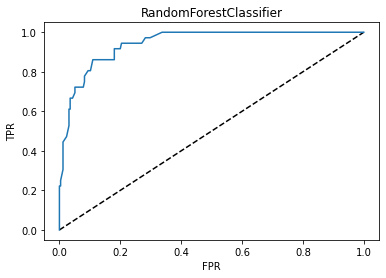

In [107]:
# Plotting the curve

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForestClassifier')
plt.show()

In [114]:
auc_score=roc_auc_score(y_test,pred_proba)
print('Accuracy : ',acc)
print('ROC_AUC score : ',auc_score)

Accuracy :  0.9209621993127147
ROC_AUC score :  0.9435185185185185


Getting good accuracy score and AUC-ROC score for the model selected

### Saving the model

In [115]:
# Saved the model in .pkl file
import pickle
file='red_wine.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [116]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.9072164948453608

In [117]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(291, 10)
(291,)


In [119]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion[20:50]

Orignal  Predicted
20        0          0
21        1          1
22        0          0
23        0          0
24        0          0
25        0          0
26        0          0
27        0          0
28        0          0
29        0          0
30        1          1
31        1          1
32        0          0
33        0          0
34        0          0
35        0          0
36        0          0
37        0          0
38        0          0
39        0          0
40        1          0
41        0          0
42        0          0
43        0          0
44        1          1
45        0          0
46        0          0
47        0          0
48        0          0
49        0          0